In [1]:
import pandas as pd
import numpy as np
import function_ML
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [81]:
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import RobustScaler

In [179]:
import seaborn as sns

In [92]:
data = pd.read_csv('weatherAUS.csv')
data=data.drop('RISK_MM',axis=1)

In [93]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71,22,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38,30,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82,33,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [94]:
data.describe(include=['object']) 

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,305,305,303,244,295,303,305
unique,305,1,16,16,16,2,2
top,2009-03-20,Albury,W,SE,WNW,No,No
freq,1,305,57,32,37,232,233


In [95]:
#unique location = 1 
data=data.drop('Location',axis=1)

In [96]:
data.isnull().sum()

Date               0
MinTemp            1
MaxTemp            0
Rainfall           2
Evaporation      305
Sunshine         305
WindGustDir        2
WindGustSpeed      2
WindDir9am        61
WindDir3pm        10
WindSpeed9am       1
WindSpeed3pm       1
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am         189
Cloud3pm         190
Temp9am            0
Temp3pm            0
RainToday          2
RainTomorrow       0
dtype: int64

In [97]:
# drop columns Evaporation-305 nan,Sunshine-305 nan,Cloud9am-189 nan,Cloud3pm-190 nan  
data=data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)   

In [98]:
# replace value No and Yes 
data['RainToday']=data['RainToday'].replace('No',0)
data['RainToday']=data['RainToday'].replace('Yes',1)
data['RainTomorrow']=data['RainTomorrow'].replace('No',0)
data['RainTomorrow']=data['RainTomorrow'].replace('Yes',1)

In [99]:
# select numeric columns and target column
data_num=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am', 
          'Pressure3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']
target=['RainTomorrow']
choose_data=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am', 
          'Pressure3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

In [100]:
data=data[choose_data].dropna()

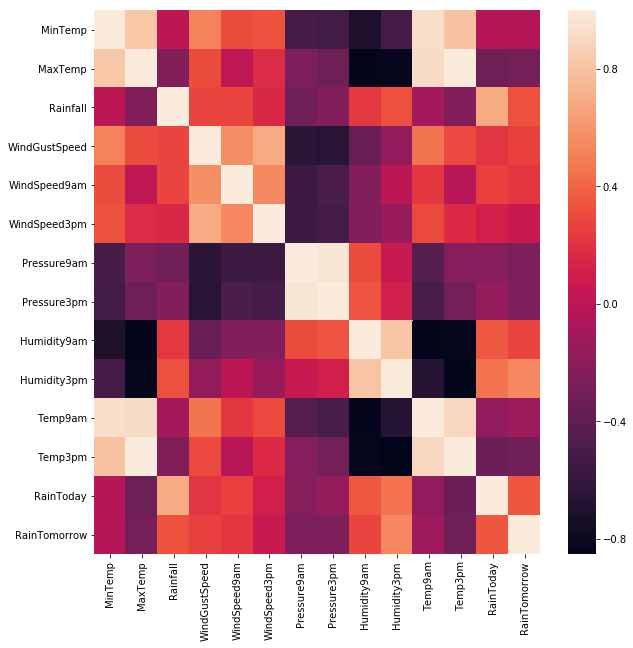

In [102]:
#visualization of the correlation matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot_kws={'size':100})


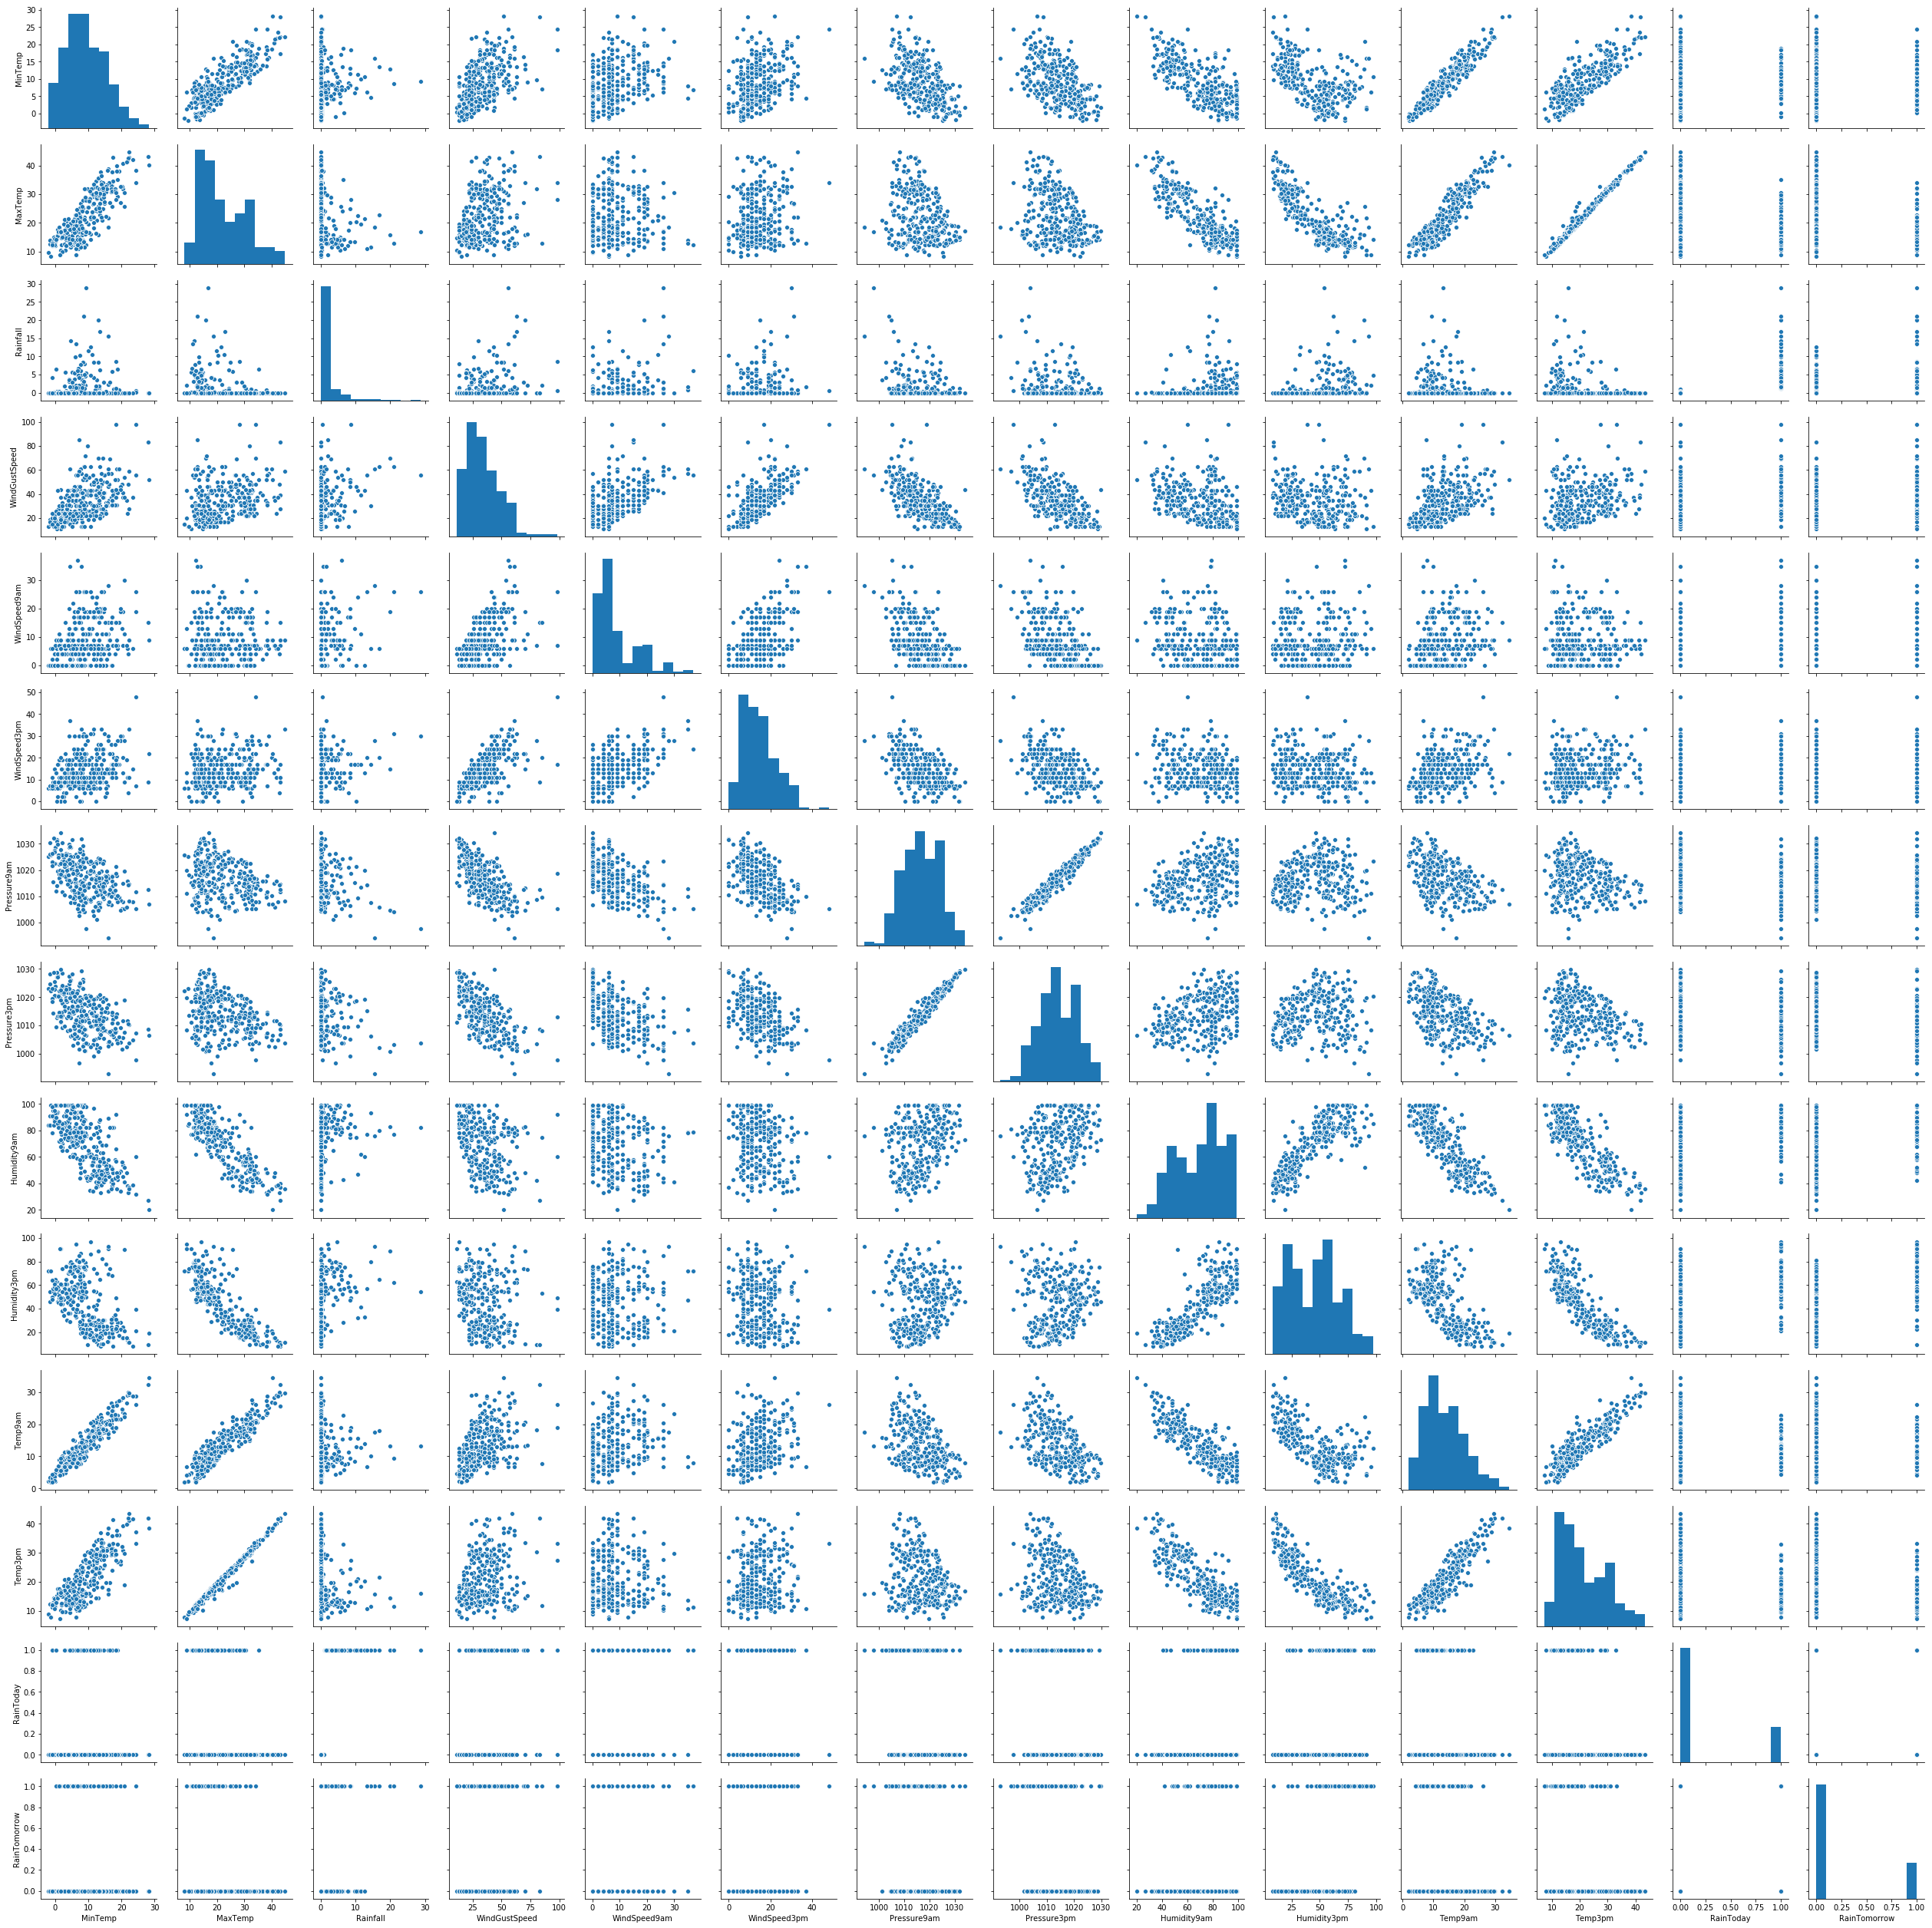

In [103]:
sns.pairplot(data)

(array([228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  72.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

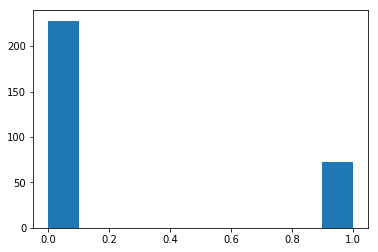

In [104]:
#histogramma shows - data unbalanced
plt.hist(data['RainTomorrow'])

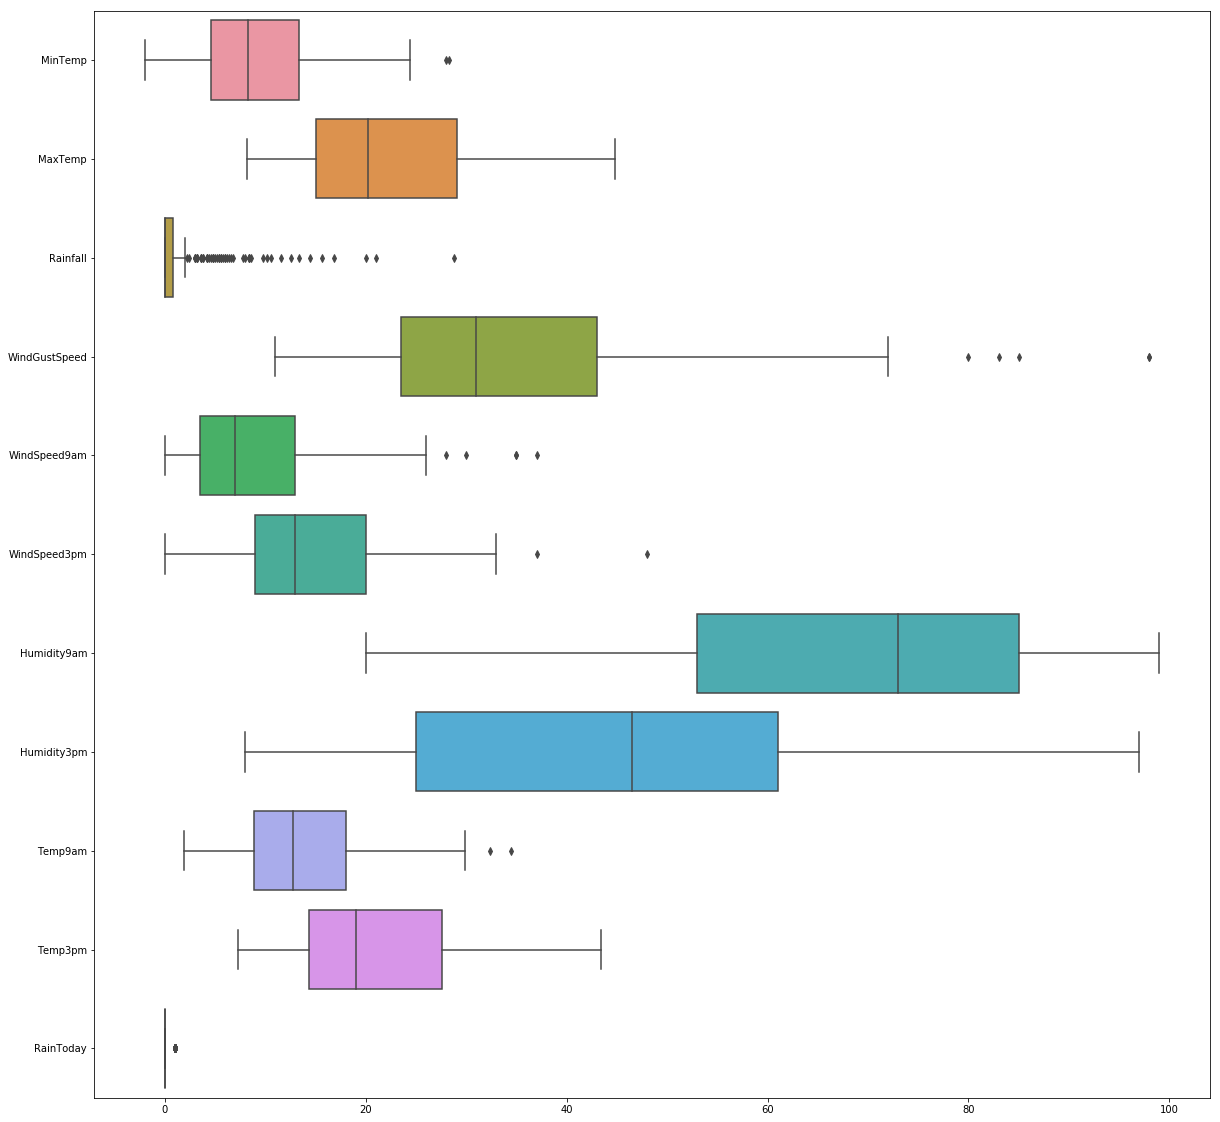

In [105]:
# select columns for boxplot ('RainToday','RainTomorrow' don't exactly have emissions)
choose_data_for_boxplot=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                         'Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']
choose_data_for_boxplot2=['Pressure9am','Pressure3pm']
plt.figure(figsize=(20,20))
sns.boxplot(data=data[choose_data_for_boxplot], orient="h")

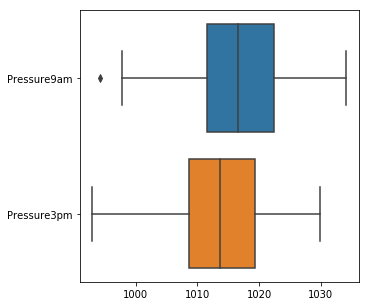

In [106]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data[choose_data_for_boxplot2], orient="h")

In [108]:
# use RobustScaler to remove outliers and scale data
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
X_scaled = rs.fit_transform(data)

(array([228.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 216.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

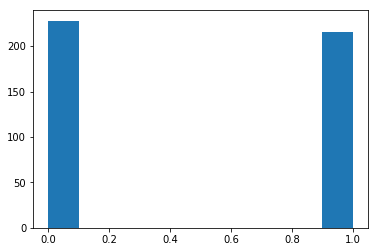

In [138]:
#data rebalancing
add_sample=data[data['RainTomorrow']==1]
balanced_data=data
balanced_data=balanced_data.append(add_sample)
balanced_data=balanced_data.append(add_sample)
plt.hist(balanced_data['RainTomorrow'])

In [145]:
#  generate train and test data 

X_train, X_test, y_train, y_test = train_test_split(balanced_data[data_num], balanced_data[target], 
                                                    test_size=0.25, shuffle=True, random_state=42)

In [168]:
from sklearn.naive_bayes import GaussianNB
Gauss = GaussianNB()
Gauss=Gauss.fit(X_train, y_train)
y_pred =Gauss.predict(X_test)
accuracy_score(y_test, y_pred)



C:\programms\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8378378378378378

In [169]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
accuracy_score(y_test, y_pred)

C:\programms\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\programms\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8918918918918919

In [171]:
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
for i in range(1,20):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn=Knn.fit(X_train, y_train)
    y_pred = Knn.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print(i,score)

1 0.9279279279279279
2 0.8648648648648649
3 0.8648648648648649
4 0.8378378378378378
5 0.8468468468468469
6 0.8738738738738738
7 0.8648648648648649
8 0.8378378378378378
9 0.8288288288288288
10 0.8288288288288288
11 0.8648648648648649
12 0.8738738738738738
13 0.8468468468468469
14 0.8378378378378378
15 0.8288288288288288
16 0.8378378378378378
17 0.8288288288288288
18 0.8378378378378378
19 0.8378378378378378


C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A co

In [167]:
Knn = KNeighborsClassifier(n_neighbors=1)
Knn=Knn.fit(X_train, y_train)
y_pred = Knn.predict(X_test)
accuracy_score(y_test, y_pred)

C:\programms\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.9279279279279279

In [174]:
from sklearn.tree import DecisionTreeClassifier
for i in range(1,15):
    for j in range(1,15):
        tree = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j)
        tree=tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        score=accuracy_score(y_test, y_pred)
        print(i,j ,score)

1 1 0.7927927927927928
1 2 0.7927927927927928
1 3 0.7927927927927928
1 4 0.7927927927927928
1 5 0.7927927927927928
1 6 0.7927927927927928
1 7 0.7927927927927928
1 8 0.7927927927927928
1 9 0.7927927927927928
1 10 0.7927927927927928
1 11 0.7927927927927928
1 12 0.7927927927927928
1 13 0.7927927927927928
1 14 0.7927927927927928
2 1 0.8378378378378378
2 2 0.8378378378378378
2 3 0.8288288288288288
2 4 0.8288288288288288
2 5 0.8288288288288288
2 6 0.8378378378378378
2 7 0.8378378378378378
2 8 0.8378378378378378
2 9 0.8378378378378378
2 10 0.8378378378378378
2 11 0.8378378378378378
2 12 0.8378378378378378
2 13 0.8378378378378378
2 14 0.8378378378378378
3 1 0.8918918918918919
3 2 0.8918918918918919
3 3 0.8828828828828829
3 4 0.8828828828828829
3 5 0.8828828828828829
3 6 0.8918918918918919
3 7 0.8918918918918919
3 8 0.8918918918918919
3 9 0.8918918918918919
3 10 0.8918918918918919
3 11 0.8918918918918919
3 12 0.8918918918918919
3 13 0.8918918918918919
3 14 0.8918918918918919
4 1 0.8828828828828

In [178]:
tree = DecisionTreeClassifier(max_depth=9,min_samples_leaf=1)
tree=tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9459459459459459